In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [48]:
df_index=pd.read_csv("economic_index.csv")

In [49]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [50]:
df_index.columns

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')

In [51]:
# drop unnecessary columns
df_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True) 

In [52]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [53]:
## check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

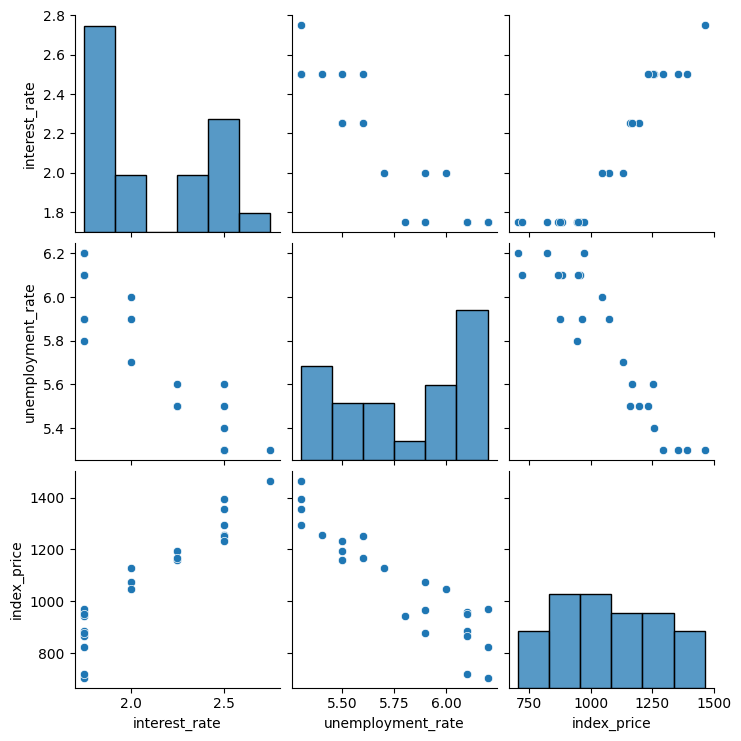

In [54]:
## Lets do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [55]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


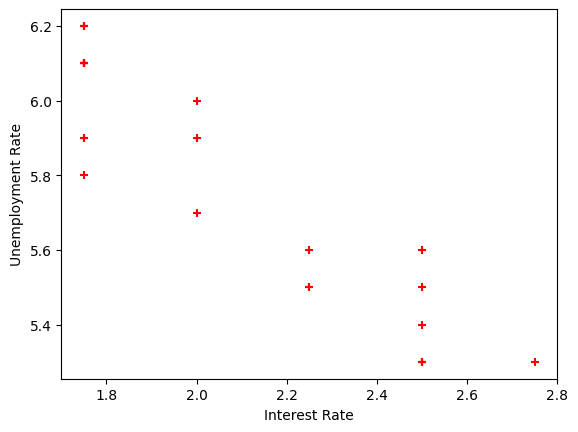

In [56]:
## visualiz the datapoint more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'],color='red', marker='+')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')
plt.show()

In [58]:
## independent and dependent features
X=df_index[['interest_rate','unemployment_rate']]
y=df_index['index_price']
X.shape, y.shape

((24, 2), (24,))

In [61]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 2), (6, 2), (18,), (6,))

<Axes: xlabel='interest_rate', ylabel='index_price'>

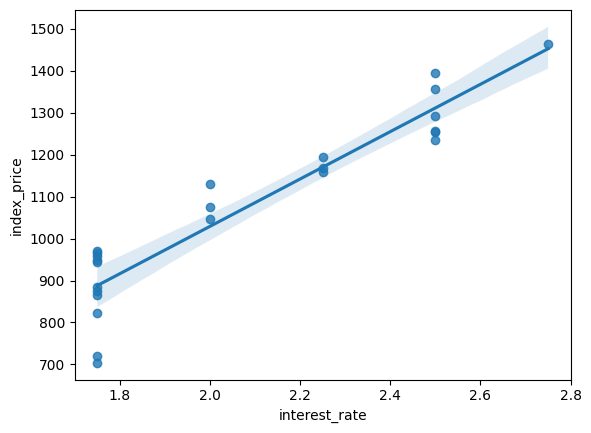

In [62]:
import seaborn as sns
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

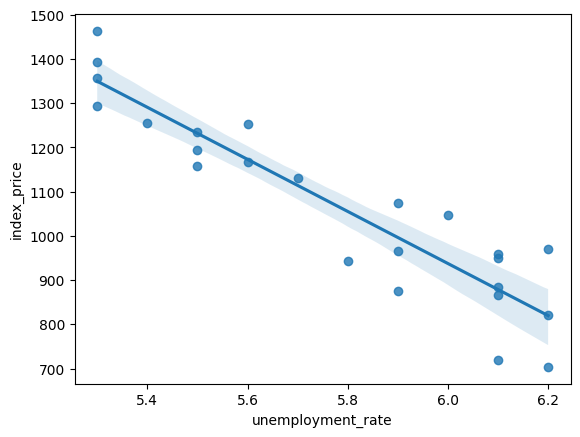

In [63]:
import seaborn as sns
sns.regplot(x='unemployment_rate', y='index_price', data=df_index)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

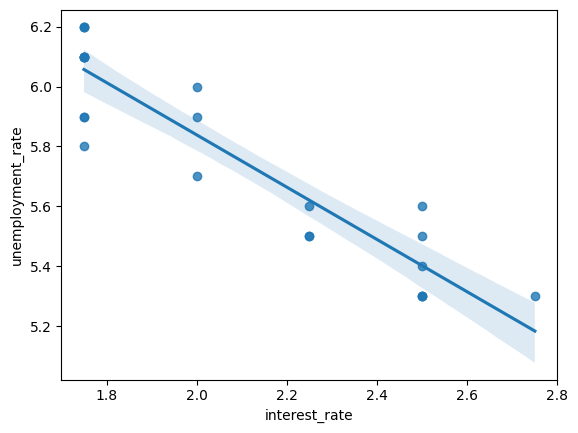

In [64]:
import seaborn as sns
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)

In [65]:
## standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) # do not fit again, just transform

In [69]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
## cross validation score 
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
mean_mse=np.mean(mse)

In [73]:
mse, mean_mse

(array([-4921.61331265, -7686.87497294, -5135.9962549 ]),
 np.float64(-5914.8281801623925))

In [74]:
## prediction
y_pred=regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [75]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred) ### r2 score is also called coefficient of determination
print("MAE :", mae)
print("MSE :", mse)
print("RMSE :", rmse)
print("R2 score :", r2) ### R2 score is between 0 to 1, 1 means perfect prediction, 0 means worst prediction

MAE : 59.9357815232356
MSE : 5793.7628877125835
RMSE : 76.11677139574815
R2 score : 0.8278978091457141


In [76]:
## adjusted r2 score
n=len(y_test)
p=X_test.shape[1]
adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2 score :", adjusted_r2)

Adjusted R2 score : 0.7131630152428567


In [ ]:
## assumptions


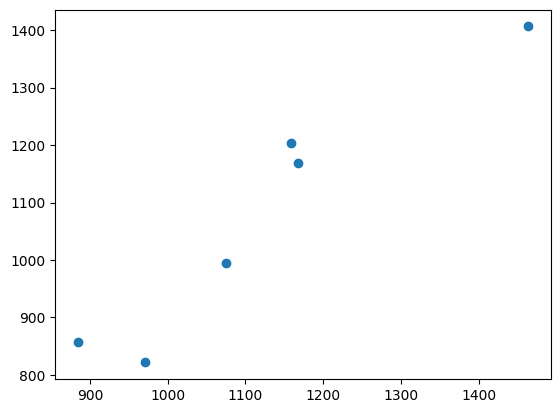

In [78]:
plt.scatter(y_test, y_pred)

In [80]:
## Errors
residuals=y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


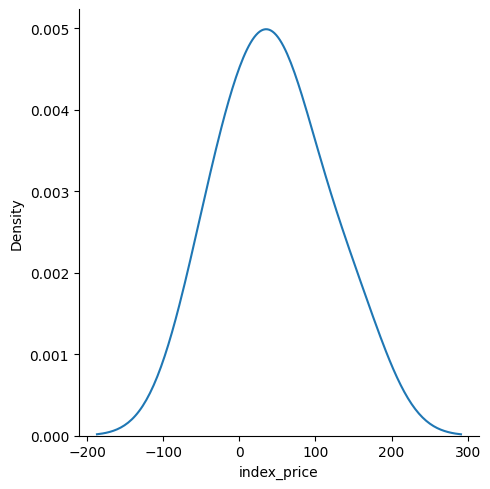

In [81]:
## plot this residuals
sns.displot(residuals, kind='kde') ## it should be normally distributed

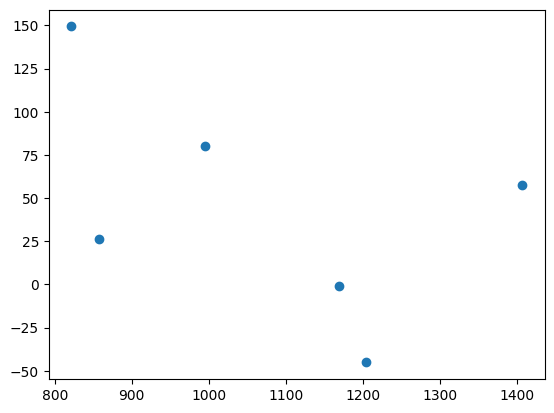

In [82]:
## create a scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [83]:
## OLS method (Ordinary Least Squares)
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train) ## adding a constant column to the independent features
ols_model=sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     69.88
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           2.50e-08
Time:                        12:58:07   Log-Likelihood:                -100.85
No. Observations:                  18   AIC:                             207.7
Df Residuals:                      15   BIC:                             210.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1053.4444     16.941     62.183      0.0

/Users/niteshranjansingh/AutoPipelineAI/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
